In [983]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [984]:
df = pd.read_csv("dinos.csv")

In [985]:
df_scaled = df.drop("Weight", axis=1)
df_scaled["Gender"] = (df_scaled["Gender"]=="M").astype("int16")
df_scaled = df_scaled.assign(Volume=df_scaled["Length"]*df_scaled["Height"]*df_scaled["Width"])

# An attempt to use the Species Feature
species = df_scaled["Species"].unique()
for specie in species:
    df_scaled[specie] = (df_scaled["Species"]==specie).astype("int16")
df_scaled = df_scaled.drop("Species", axis=1)

m,n=df_scaled.shape

df_scaled.head()

,Length,Age,TailLength,Height,Width,Gender,Completeness,Volume,Iguanadon,Pterodactyl,Brachiosaurus,Raptor,Vulcanodon,Stegosaurus,Plateosaurus
0,59.0,63.4,68.0,10.8120,7.480,1,0.545,4771.551840,1,0,0,0,0,0,0
1,22.0,24.0,25.5,6.3750,3.825,1,0.531,536.456250,0,1,0,0,0,0,0
2,37.1,40.0,42.5,11.1350,6.630,0,0.661,2738.909355,0,1,0,0,0,0,0
3,23.2,25.4,30.0,11.5200,4.020,0,0.793,1074.401280,0,0,1,0,0,0,0
4,36.5,39.0,41.4,11.1366,6.003,1,0.931,2440.134858,0,1,0,0,0,0,0


# Scaling

In [986]:
# Min-Max Scaling (Normalization)

for i in range(n):
    series = df_scaled.iloc[:, i]
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:, i] = (series - min_value) / (max_value - min_value)


#standardization Scaling 
"""
for i in range(n):    
    x= df_scaled.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:, i]= stanadardized_x
"""

df_scaled.head()

,Length,Age,TailLength,Height,Width,Gender,Completeness,Volume,Iguanadon,Pterodactyl,Brachiosaurus,Raptor,Vulcanodon,Stegosaurus,Plateosaurus
0,1.000000,1.000000,1.000000,0.527240,0.906687,1.0,0.543060,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281553,0.283636,0.282095,0.269703,0.391492,1.0,0.528875,0.109266,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.574757,0.574545,0.569257,0.545987,0.786874,0.0,0.660588,0.572490,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.304854,0.309091,0.358108,0.568334,0.418978,0.0,0.794326,0.222407,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.563107,0.556364,0.550676,0.546080,0.698495,1.0,0.934144,0.509651,0.0,1.0,0.0,0.0,0.0,0.0,0.0


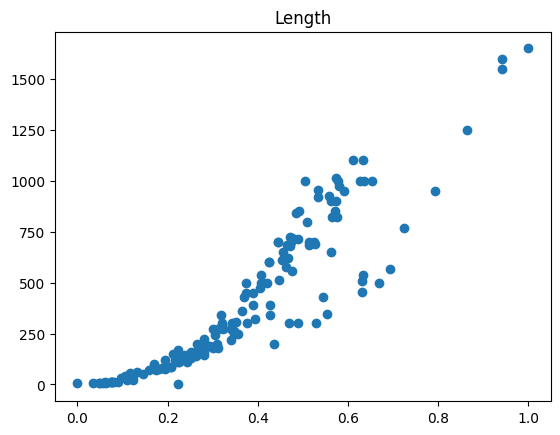

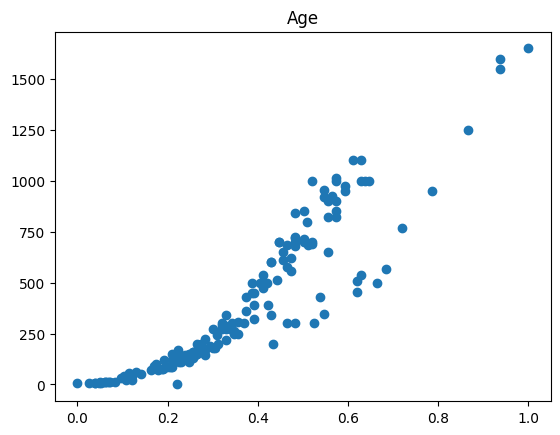

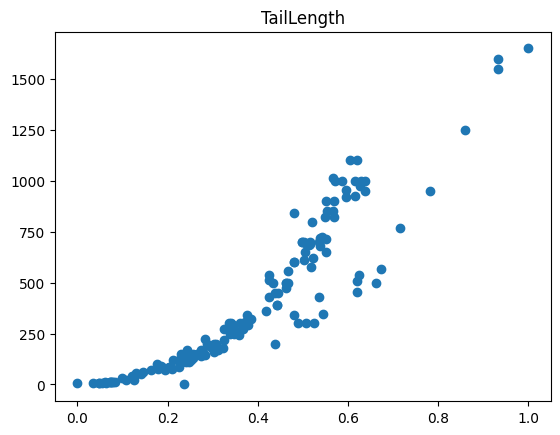

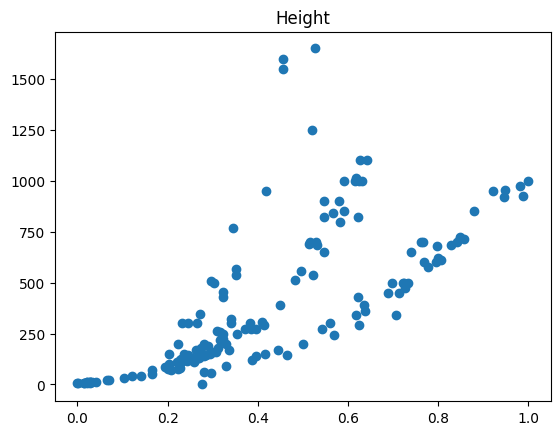

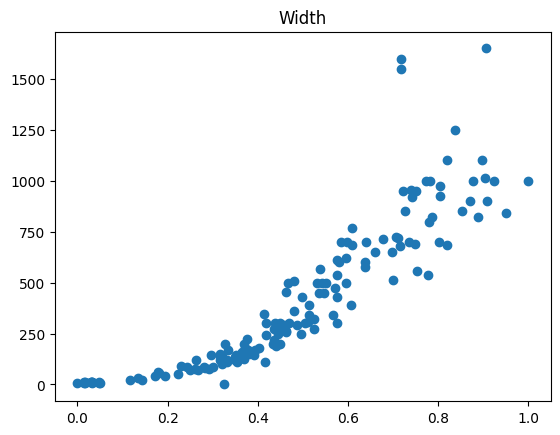

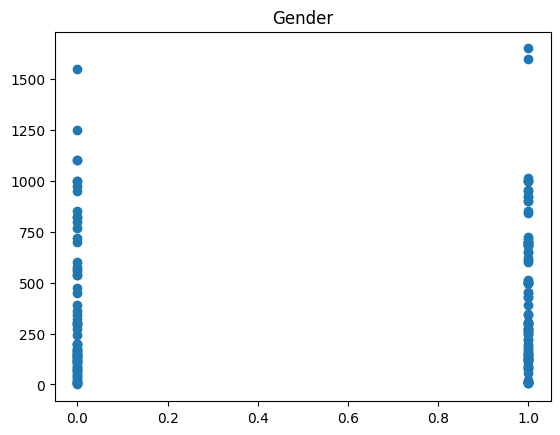

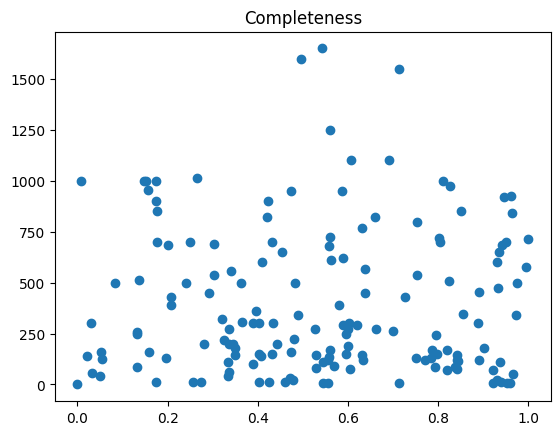

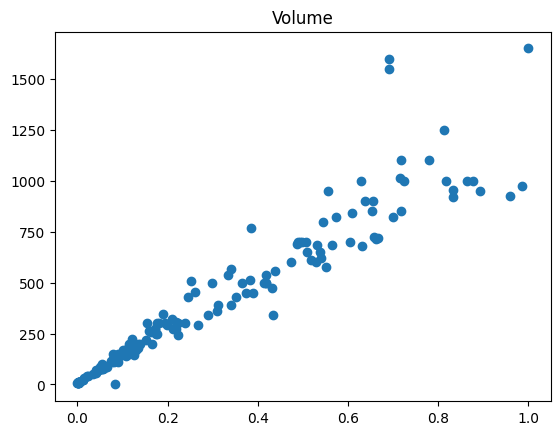

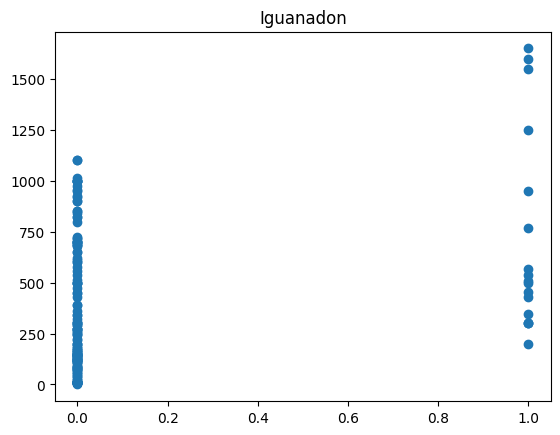

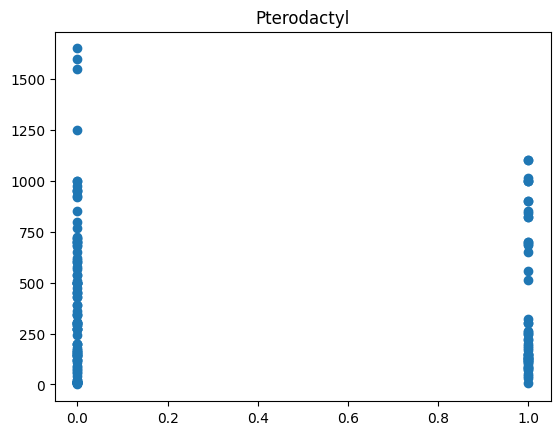

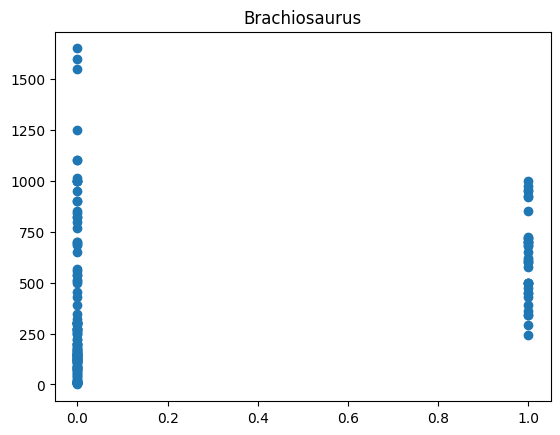

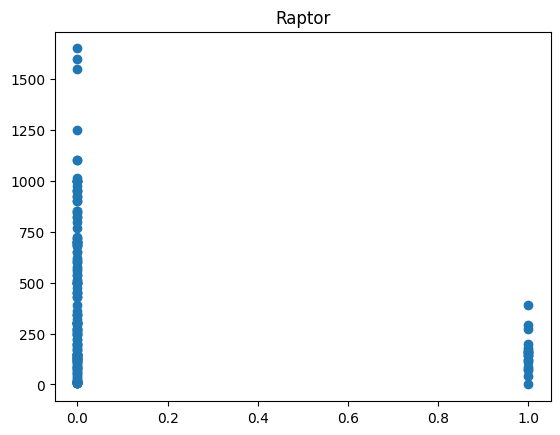

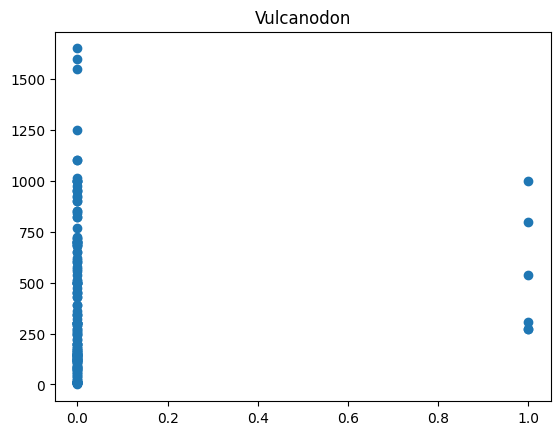

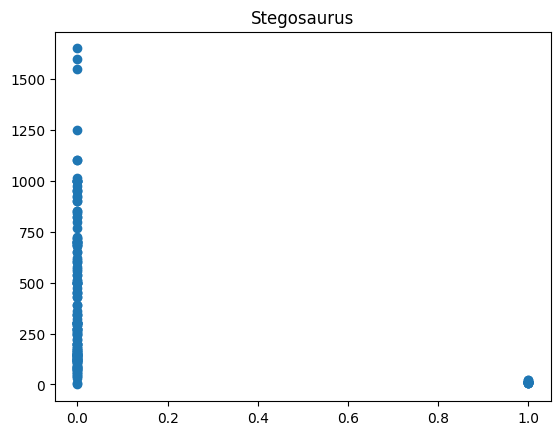

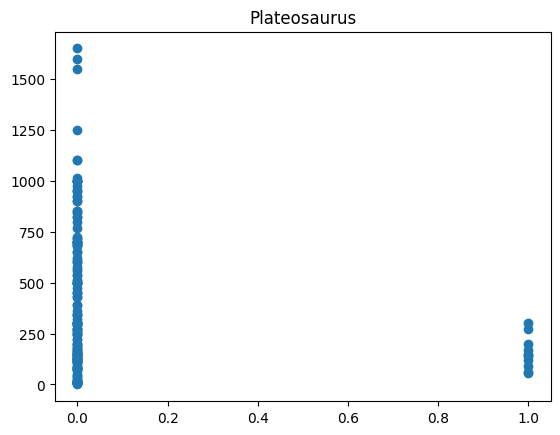

In [987]:
cols = df_scaled.columns




for label in cols:
    plt.scatter(df_scaled[label], Y)
    plt.title(label)
    plt.show()



Since *Completenes* does not to have any relation to weigth we will dorp it from the dataframe 

In [988]:
df_scaled = df_scaled.drop("Completeness", axis=1)
#df_scaled = df_scaled.drop("Volume", axis=1)

# Test and Train split

In [989]:
train, test = np.split(df_scaled, [int(0.7*len(df_scaled))])

Y, Y_test = np.split(df["Weight"], [int(0.7*len(df["Weight"]))])

In [990]:

squares = ["Length", "Age", "TailLength", "Height", "Width"]
df2= pd.DataFrame()
for feature in squares:
	df2[feature] = df_scaled[feature]
 
df2 = pd.DataFrame(df2.values**2)
train2, test2 = np.split(df2, [int(0.7*len(df2))])
X2 = train2.to_numpy()
m,n2 = train2.shape

Y = df["Weight"]
X = train.to_numpy()
#cols = ["Length", "Age", "TailLength", "Height", "Width", "Gender", "Volume"]
m,n = train.shape

As some of the data seems to following the x^2+x+c=0 graph polynomial regression would be better fitting to the model.

# Training

In [991]:
w = np.zeros(n) #parameter vector
w2 = np.zeros(n2)
b=0

alpha = 1*pow(10, -4) #learniing rate
#exp 0.0001, linear 0.01

lamb = 2*pow(10,2)# regularization factor
#exp 200000, linear 1000

epochs = 8000 #number of iterations
#exp 1000 linear 1000

Cost=np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    Y_pred = pd.Series(np.zeros(m))#a pandas series 
    
    #linear curve 
    Y_pred = np.dot(X2, w2) + np.dot(X , w) + b * pd.Series(np.ones(m)) 

    #exponential curve
    #Y_pred = np.exp(X@w + b * pd.Series(np.ones(m))) 
    
    D_w = (1/m)*np.sum(Y_pred- Y)*(X) + (lamb/(2*m))*w
    D_w2 = (1/m)*np.sum(Y_pred- Y)*X2 + (lamb/(2*m))*w2
    D_b = (1/m)*np.sum(Y_pred- Y)

    cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2)) + (lamb/(2*m))*np.sum(w**2) + (lamb/(2*m))*np.sum(w2**2)
    #exp cost = to be figured
    Cost[i]= cost
    
    w = w - alpha * D_w[0]
    w2 = w2 - alpha * D_w2[0]
    b = b - alpha * D_b

print(f"w2={w2}\nw={w}\nb={b}")

w2=[66.05190719 66.05190719 66.05190719 18.36121387 54.30003452]
w=[66.05190719 66.05190719 66.05190719 34.82518047 59.88840322 66.05190719
 66.05190719 66.05190719  0.          0.          0.          0.
  0.          0.        ]
b=104.91158817510663


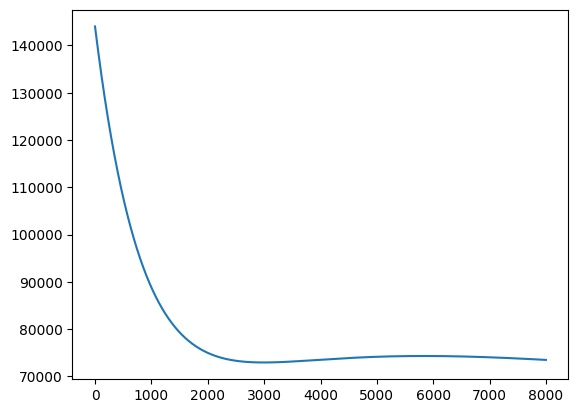

In [992]:
plt.plot(iter, Cost)
plt.show()

In [993]:
print(Cost.min())

72922.9558336958


In [994]:
print(cost)

73466.6576555084


# Testing

In [995]:

X_test = test.to_numpy()
X_test2 = test2.to_numpy()
#cols = ["Length", "Age", "TailLength", "Height", "Width", "Gender", "Volume"]
m_test, n_test = test.shape
_, n_test2 = test2.shape

In [996]:
Y_test_pred = X_test2 @ w2 + X_test @ w + b
cost_test = (1/(2*m_test))*np.sum(pow(Y_test_pred-Y_test, 2)) 
print(cost_test)

27449.827399632486


In [997]:
def errors(Y_pred, Y):
	error = abs(Y_pred - Y_test)
	MSE = np.mean(pow(error, 2))
	MAE = np.mean(abs(error))
	MAEP = np.mean(abs(error)/Y)*100

	print("Mean Absolute Error: ",MAE) 
	print("Mean Squared Error: ",MSE)
	print("Mean Absolute Error percentage: ",MAEP)

In [998]:
errors(Y_test_pred, Y_test)

Mean Absolute Error:  178.6741852319252
Mean Squared Error:  54899.65479926497
Mean Absolute Error percentage:  196.08051760987365


In [999]:
def absolute_error_percentage(Y_pred_test, Y_test):
        error = np.abs(Y_pred_test - Y_test)
        error_percentage = error * 100 / Y_test
        absolute_error_percentage = np.sum(error_percentage)/m_test
        return absolute_error_percentage

def mean_squared_error_percentage(Y_pred_test, Y_test):
        error = (Y_pred_test - Y_test)**2
        error_percentage = error * 100 / (Y_test**2)
        mean_squared_error_percentage = np.sum(error_percentage)/m_test
        return mean_squared_error_percentage


print(f'absolute_error_percentage= {absolute_error_percentage(Y_test_pred, Y_test)}')
print(f'mean_squared_error_percentage= {mean_squared_error_percentage(Y_test_pred, Y_test)}')


absolute_error_percentage= 196.08051760987368
mean_squared_error_percentage= 2322.2950088548464


the values of hyperparameters which look better on graph give worse scores for MSE and MAE
while the ones that are clearly worse graphically give better MSE and MAE scores

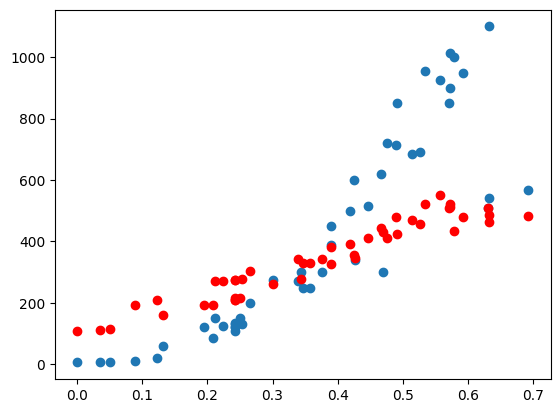

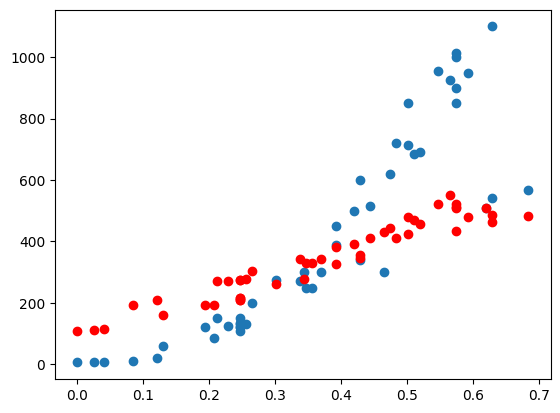

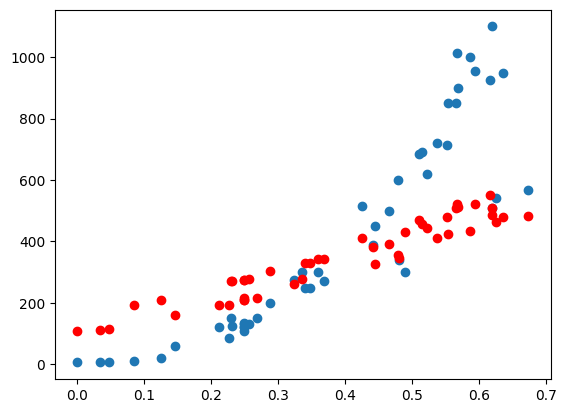

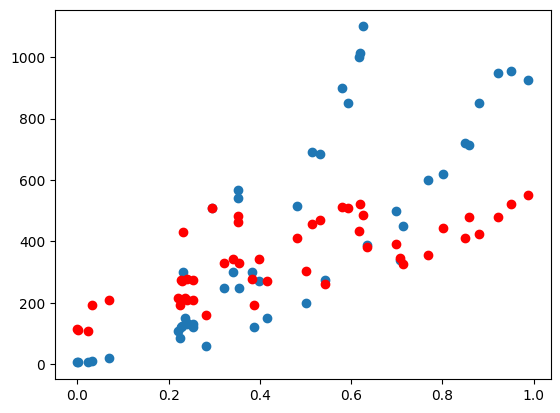

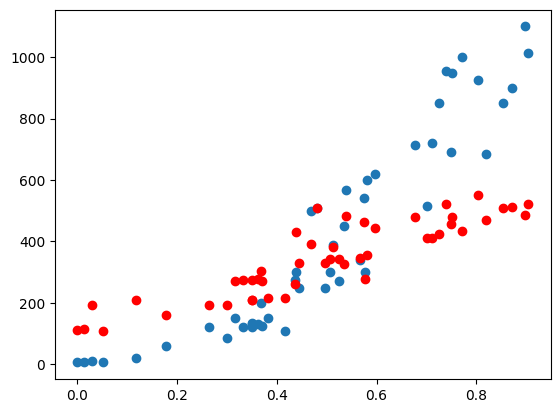

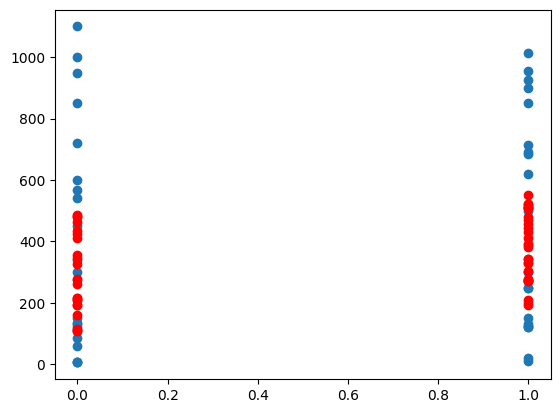

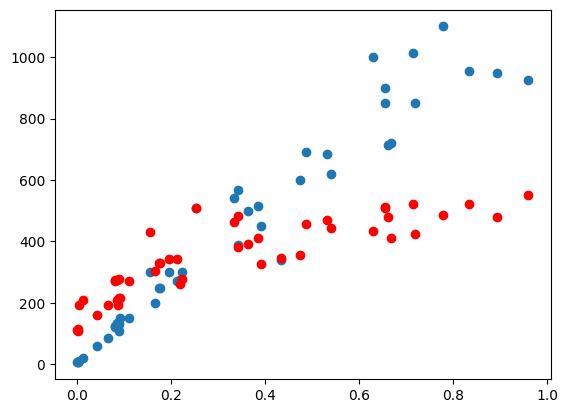

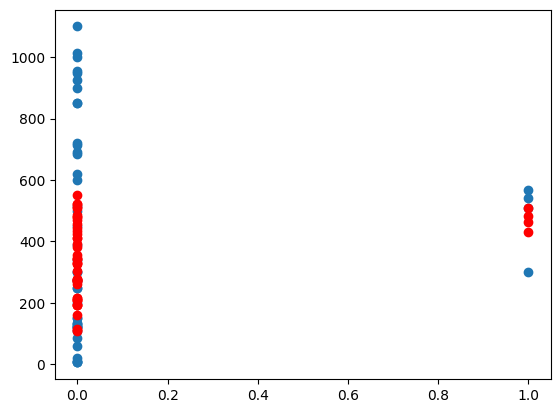

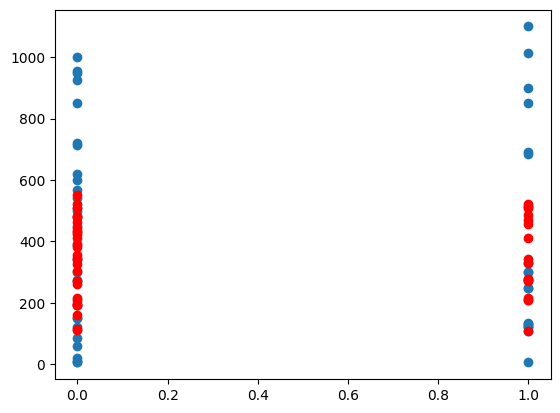

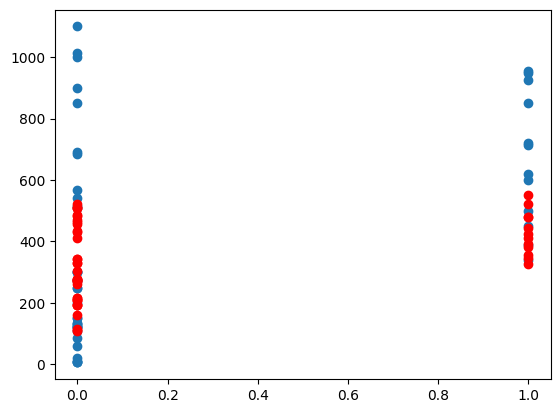

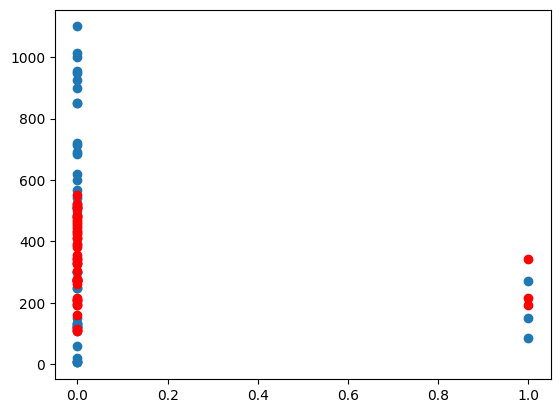

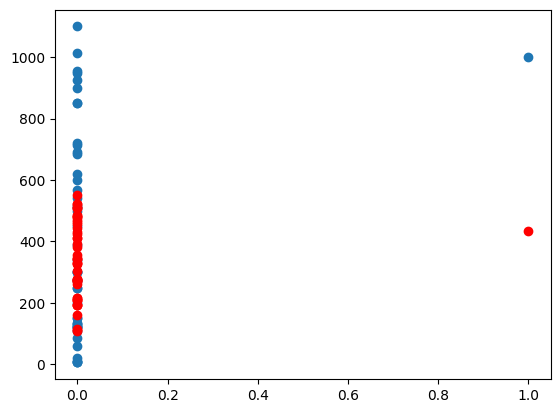

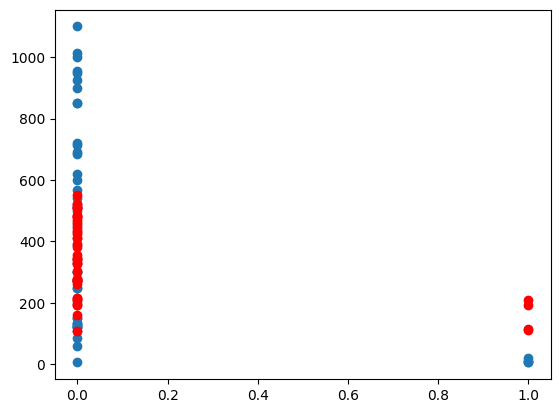

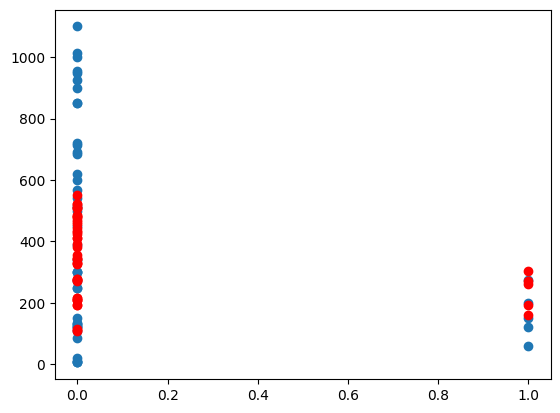

In [1000]:
for i in range(n_test):
    plt.scatter(test.iloc[:, i], Y_test)
    plt.scatter(test.iloc[:, i], Y_test_pred, color="red")
    #plt.plot([min(X_test[i]), max(X_test[i])], [min(Y_pred_test), max(Y_pred_test)], color='red')
    plt.show()